# Multivariate Linear Regression

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [2]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Splitting the dataset into Features and Labels

In [3]:
# Split the dataset into features and labels
X = diabetes.data
y = diabetes.target

### Shuffling the dataset

In [4]:
def shuffle_data(X, y):
    # Convert input lists X and y into numpy arrays
    X, y = np.array(X), np.array(y)
    # Create an array of indices ranging from 0 to the number of rows in X
    indices = np.arange(X.shape[0]) 
    # Shuffle the indices randomly
    np.random.shuffle(indices) 
    # Use the shuffled indices to shuffle the corresponding elements in X and y
    X, y = X[indices], y[indices]
    # Return the shuffled data as two arrays X and y
    return X, y

X , y = shuffle_data(X, y)

In [5]:
# make sure that the labels and features are still matching after shuffling the data.
print(X[:5])
print(y[:5])

[[ 0.01991321 -0.04464164 -0.02345095 -0.07108515  0.02044629 -0.01008203
   0.11859122 -0.0763945  -0.0425721   0.07348023]
 [-0.03094232 -0.04464164  0.04660684  0.01498661 -0.01670444 -0.04703355
   0.00077881 -0.00259226  0.06345592 -0.02593034]
 [-0.04183994 -0.04464164  0.12852056  0.0631868  -0.03321588 -0.03262872
   0.01182372 -0.03949338 -0.01599827 -0.05078298]
 [-0.08179786 -0.04464164 -0.0816528  -0.04009932  0.0025589  -0.01853704
   0.07072993 -0.03949338 -0.01090444 -0.09220405]
 [ 0.07076875 -0.04464164  0.06924089  0.03793909  0.02182224  0.00150446
  -0.03603757  0.039106    0.07763279  0.10661708]]
[ 92.  99. 259.  51. 220.]


### Splitting the dataset into the Training set ,Test set and dev set

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets, with test set size of 40% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the test set into dev and test sets, with test set size of 50% i.e 20% test, 20% dev
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [7]:
# Print the shapes of the train, dev, and test sets
print("Train set: ", X_train.shape, y_train.shape)

print("Dev set: ", X_dev.shape, y_dev.shape)

print("Test set: ", X_test.shape, y_test.shape)

Train set:  (265, 10) (265,)
Dev set:  (88, 10) (88,)
Test set:  (89, 10) (89,)


In [8]:
# Number of features
n_features = X_train.shape[1]

# Initialize the weights and bias
weights = np.zeros(n_features)
bias = 0

In [9]:
def hypothesis(X, weights, bias):
    # Return the predicted value of y
    return np.dot(X, weights) + bias

def mean_squared_error(y_true, y_pred):
    # Return the mean squared error between y_true and y_pred
    return np.mean((y_true - y_pred)**2)

def cost(X, y, weights, bias):
    # Return the cost using mean squared error
    y_pred = hypothesis(X, weights, bias)
    return mean_squared_error(y, y_pred)


### Implementing the Gradient Descent Algorithm

In [10]:
def gradient_descent(X, y, weights, bias, learning_rate):
    """
    Perform a single iteration of gradient descent to update the weights and bias

    Parameters:
        X (np.array): input data with shape (n_samples, n_features)
        y (np.array): target data with shape (n_samples,)
        weights (np.array): weight coefficients with shape (n_features,)
        bias (float): bias term
        learning_rate (float): learning rate for gradient descent

    Returns:
        weights (np.array): updated weight coefficients with shape (n_features,)
        bias (float): updated bias term
    """
    # Calculate the predicted values using the current weights and bias
    y_pred = hypothesis(X, weights, bias)

    # Calculate the gradient for the weights
    d_weights = -2 * np.dot(X.T, (y - y_pred)) / X.shape[0]

    # Calculate the gradient for the bias
    d_bias = -2 * np.mean(y - y_pred)

    # Update the weights and bias using the calculated gradients
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

    return weights, bias


### Training the model

In [11]:
# defining the training function
def train_model(X, y, weights, bias, learning_rate, n_iters):
    costs = []

    for i in range(n_iters):
        # Perform a single iteration of gradient descent
        weights, bias = gradient_descent(X, y, weights, bias, learning_rate)

        # Calculate the cost over the entire training set
        cost_ = cost(X, y, weights, bias)

        # Print the cost every 100 iterations
        if i % 100 == 0:
            print("Cost at iteration {}:\t {}".format(i, cost_))

        # Append the cost to the costs list
        costs.append(cost_)

    return weights, bias, costs

Cost at iteration 0:	 29906.623169800954
Cost at iteration 100:	 22041.156710373103
Cost at iteration 200:	 16768.577368337723
Cost at iteration 300:	 13233.321735934167
Cost at iteration 400:	 10862.135422096346
Cost at iteration 500:	 9270.919946769354
Cost at iteration 600:	 8202.317233369438
Cost at iteration 700:	 7483.889257729543
Cost at iteration 800:	 7000.097098959382
Cost at iteration 900:	 6673.52602314482
Cost at iteration 0:	 6436.119990319524
Cost at iteration 100:	 5952.564760531499
Cost at iteration 200:	 5875.441347643607
Cost at iteration 300:	 5807.60539151369
Cost at iteration 400:	 5742.001081682859
Cost at iteration 500:	 5678.433907382942
Cost at iteration 600:	 5616.832456104412
Cost at iteration 700:	 5557.129852462427
Cost at iteration 800:	 5499.261590251746
Cost at iteration 900:	 5443.165413922547
Cost at iteration 0:	 5383.964925631438
Cost at iteration 100:	 4923.467424106616
Cost at iteration 200:	 4581.3645486409105
Cost at iteration 300:	 4323.6686945

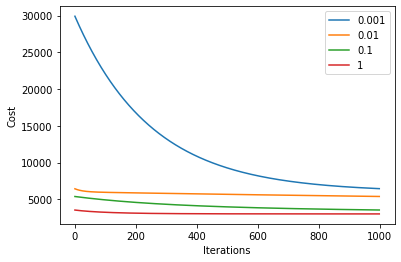

In [12]:
# Testing different learning rates
def plot_learning_rates(X, y, weights, bias, n_iters):
    learning_rates = [0.001, 0.01, 0.1, 1]
    costs = []

    for learning_rate in learning_rates:
        # Train the model with the current learning rate
        weights, bias, cost_ = train_model(X, y, weights, bias, learning_rate, n_iters)

        # Append the cost of the current model to the list of costs
        costs.append(cost_)

    # Plot the costs for each learning rate
    plt.plot(costs[0], label="0.001")
    plt.plot(costs[1], label="0.01")
    plt.plot(costs[2], label="0.1")
    plt.plot(costs[3], label="1")
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

plot_learning_rates(X_train, y_train, weights, bias, 1000)

The optimal learning rate is 0.01 because it consistently provides stability as the number of iterations increases.

In [17]:
# Train the model for 1000 iterations
weights, bias, costs = train_model(X_train, y_train, weights, bias, learning_rate=0.01, n_iters=1000)

Cost at iteration 0:	 3406.0116263125155
Cost at iteration 100:	 3022.9587153227576
Cost at iteration 200:	 3016.2166402566872
Cost at iteration 300:	 3016.0910949597546
Cost at iteration 400:	 3016.081910732348
Cost at iteration 500:	 3016.074797609971
Cost at iteration 600:	 3016.067745666411
Cost at iteration 700:	 3016.060719156765
Cost at iteration 800:	 3016.0537170588937
Cost at iteration 900:	 3016.0467389724004


In [19]:
# defining the prediction function
def predict_model(X, weights, bias):
    # Calculate the predicted values using the current weights and bias
    y_pred = hypothesis(X, weights, bias)

    return y_pred


In [20]:
# Make predictions on the dev set
y_pred = predict_model(X_dev, weights, bias)

# Calculate the mean squared error
mse = mean_squared_error(y_dev, y_pred)

print("Mean Squared Error: {}".format(mse))

Mean Squared Error: 2323.31737269564


### Testing the model on the test set

In [21]:
# testing the model on the test set
y_pred = predict_model(X_test, weights, bias)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: {}".format(mse))

Mean Squared Error: 3165.4205143477434
